In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import skew
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'sklearn'

In [4]:
df = pd.read_csv('../Dataset/cleaned_train.csv')
print(df.shape)
df.head()

(6988, 3)


,text,category,stance
0,بيل غيتس تلقى لقاح كوفيد19 من غير تصوير إبر و ...,celebrity,1
1,وزير صح حد يوم تحديد هل بمؤتمروا صحفي كان ما ع...,info_news,1
2,قول رح يكونو أد مسؤولي ب لبنان ما وصل لقاح ؟ أ...,info_news,1
3,تركيا . . وزير صح فخر دين قوجة تلقى أول جرع من...,celebrity,1
4,وئام وهاب شتم دول خليجي في كل طل إعلامي تسافه ...,personal,0


In [5]:
print(df['stance'].value_counts())
print(df['category'].value_counts())


 1    5538
 0    1012
-1     438
Name: stance, dtype: int64
info_news       3616
personal        1025
celebrity        975
plan             606
unrelated        323
others           167
requests         112
rumors            79
advice            67
restrictions      18
Name: category, dtype: int64


In [6]:
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['stance'], test_size=0.2, random_state=42,stratify=df['stance'])
print(x_train.shape)
print(x_test.shape)
print(y_train.value_counts())
print(y_test.value_counts())

(5590,)
(1398,)
 1    4430
 0     810
-1     350
Name: stance, dtype: int64
 1    1108
 0     202
-1      88
Name: stance, dtype: int64


0.6735483309281262


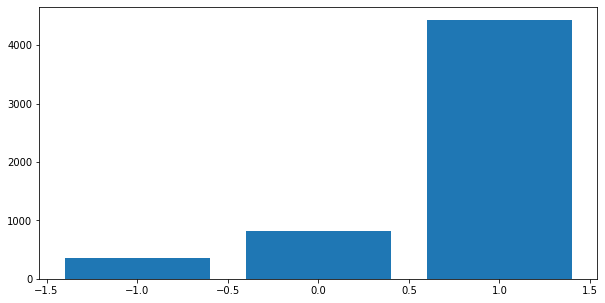

ModuleNotFoundError: No module named 'seaborn'

In [14]:
print(skew(y_train.value_counts()))
# plot the skewness
plt.figure(figsize=(10,5))
plt.bar(y_train.value_counts().index,y_train.value_counts().values)
plt.show()

import seaborn as sns
sns.distplot(y_train.value_counts())
plt.show()

In [27]:
clf = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer(ngram_range=(1,1), max_df=0.6)),
    ('SVM', svm.SVC(kernel='linear', C=1.0, probability=True))
])

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.76      0.18      0.29        88
           0       0.57      0.22      0.32       202
           1       0.83      0.97      0.90      1108

    accuracy                           0.82      1398
   macro avg       0.72      0.46      0.50      1398
weighted avg       0.79      0.82      0.77      1398



In [23]:
clf = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer(ngram_range=(1,1), max_df=0.5, min_df=2)),
    ('multinomial_NB', MultinomialNB())
])

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        88
           0       0.70      0.08      0.14       202
           1       0.80      1.00      0.89      1108

    accuracy                           0.80      1398
   macro avg       0.50      0.36      0.34      1398
weighted avg       0.74      0.80      0.73      1398



c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [36]:
clf = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer(ngram_range=(1,1), max_df=0.5)),
    ('ٌRandom Forest', RandomForestClassifier(n_estimators=100, random_state=2002))
])

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.68      0.17      0.27        88
           0       0.56      0.12      0.20       202
           1       0.82      0.98      0.89      1108

    accuracy                           0.81      1398
   macro avg       0.68      0.43      0.46      1398
weighted avg       0.77      0.81      0.75      1398

